In [1]:
from lsst.daf.butler import Butler
import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage
import matplotlib.pyplot as plt
import numpy

repo_path = "/sdf/group/rubin/repo/main/"
butler = Butler(repo_path)
registry = butler.registry

datasetRefs = list(registry.queryDatasets(datasetType="cpPtcExtract", collections=['u/abrought/BF/2023.06.16/ptc.2023.04.17']))


In [2]:
#raw.getMetadata()
#ptc

In [3]:
#numpy.where(ptc.rawMeans[amp]==True)

307 307
78.5411


164.159


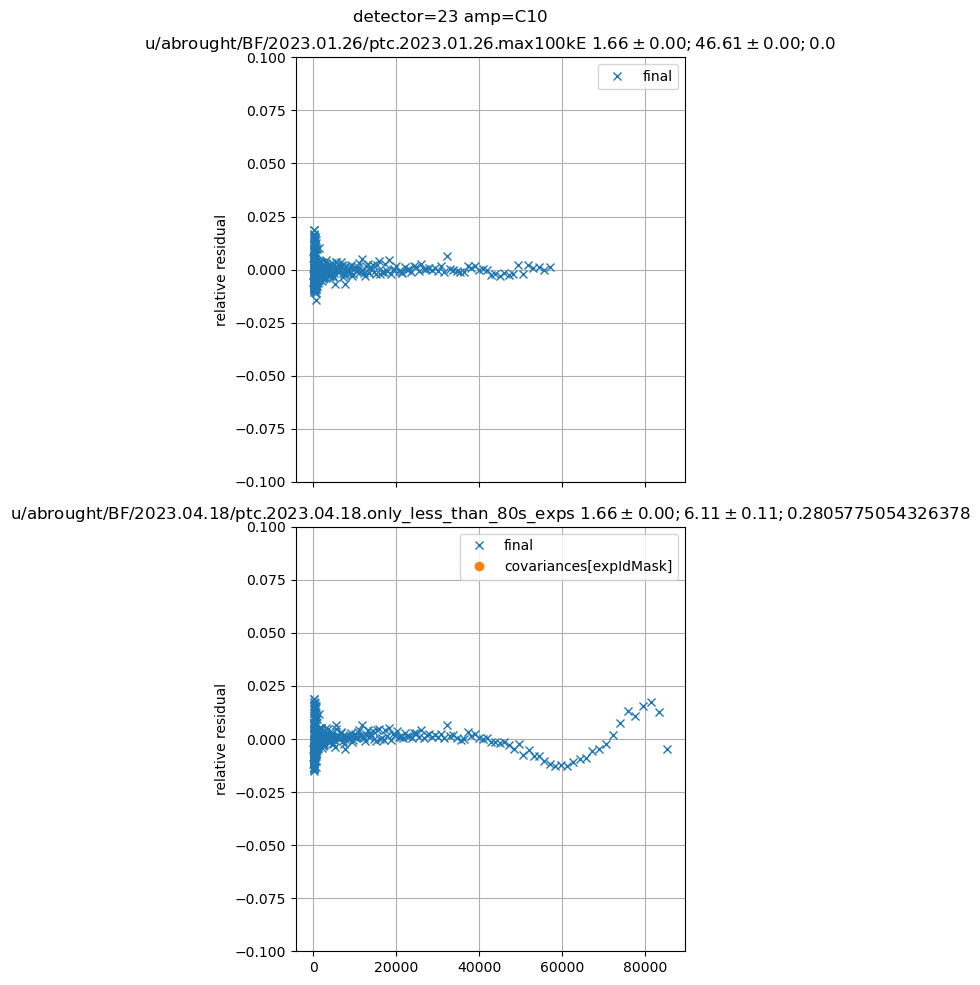

In [65]:
fig,axs=plt.subplots(2,1,figsize=(5,10),sharex=True)
amp="C10"
detector=23
for ax, collections in zip(axs, [
    'u/abrought/BF/2023.01.26/ptc.2023.01.26.max100kE',
    'u/abrought/BF/2023.04.18/ptc.2023.04.18.only_less_than_80s_exps'
    ]):
    ptc=butler.get('ptc', detector=detector, instrument='LSSTCam', collections=collections)
    if collections == 'u/abrought/BF/2023.01.26/ptc.2023.01.26.max100kE':
        mask = numpy.asarray(ptc.expIdMask[amp])
        print(len(ptc.rawMeans[amp]),mask.sum())
        ax.plot(ptc.finalMeans[amp], (numpy.array(ptc.finalVars[amp])-numpy.array(ptc.finalModelVars[amp]))/numpy.array(ptc.finalVars[amp]),
                "x",label="final")

        #ax.plot(numpy.array(ptc.finalMeans[amp]),
        #        (numpy.array(ptc.covariances[amp])[:,0,0]-numpy.array(ptc.covariancesModel[amp])[:,0,0])/numpy.array(ptc.covariancesModel[amp])[:,0,0],
        #        "o",label="covariances")    
        print(numpy.max(ptc.rawExpTimes[amp]))
    else:
        mask = numpy.asarray(ptc.expIdMask[amp])
        print(numpy.max(ptc.rawExpTimes[amp]))
        
        ax.plot(numpy.array(ptc.finalMeans[amp]), 
                ((numpy.array(ptc.finalVars[amp])-numpy.array(ptc.finalModelVars[amp]))/numpy.array(ptc.finalVars[amp])),
                "x",label="final")

        ax.plot(numpy.array(ptc.finalMeans[amp]),
                ((numpy.array(ptc.covariances[amp])[:,0,0]-numpy.array(ptc.covariancesModel[amp])[:,0,0])/numpy.array(ptc.covariancesModel[amp])[:,0,0])[mask],
                "o",label="covariances[expIdMask]")    

    
    ax.set_title(f"{collections} ${ptc.gain[amp]:.2f}\pm{ptc.gainErr[amp]:.2f};{ptc.noise[amp]:.2f}\pm{ptc.noiseErr[amp]:.2f};{ptc.ptcFitChiSq[amp]}$")
    #ax.semilogx()
    ax.set_ylim(-.1,.1)
    ax.grid()
    ax.legend()
    ax.set_ylabel("relative residual")
fig.suptitle(f"detector={detector} amp={amp}")
fig.tight_layout()

In [5]:
import itertools

list(itertools.product( range(4), range(4) ))
numpy.array(ptc.covariances[amp][0]).shape

(8, 8)

In [ ]:
fig,axs=plt.subplots(8,8,figsize=(20,20),sharex=True)
#plt.subplots_adjust(hspace=0,wspace=0)

amp="C10"
collections = 'u/abrought/BF/2023.01.26/ptc.2023.01.26.max100kE'
#collections = "u/abrought/BF/2023.04.17/ptc.2023.04.17"
for (i,j) in itertools.product( range(8), range(8) ):
    ax=axs[7-i][j] ## y,x
    for detector in [ 112, 23 ]:
        ptc=butler.get('ptc', detector=detector, instrument='LSSTCam', collections=collections)
    #    ax.plot(ptc.finalMeans[amp], (numpy.array(ptc.finalVars[amp])-numpy.array(ptc.finalModelVars[amp]))/numpy.array(ptc.finalVars[amp]),
    #            "x",label="final")

        c=ax.plot(numpy.array(ptc.rawMeans[amp])[ptc.expIdMask[amp]],
                ((numpy.array(ptc.covariances[amp])[:,i,j]-numpy.array(ptc.covariancesModel[amp])[:,i,j])/numpy.array(ptc.covariancesModel[amp])[:,i,j])[ptc.expIdMask[amp]]
                ,label=detector)
        ax.axvline(ptc.ptcTurnoff[amp],color=c[0].get_color())        

        ax.set_title(f"{j}{i}")
        ax.semilogx()
    #    ax.set_ylim(-.05,.05)
        ax.grid()
#        ax.legend()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.supylabel("relative residual")
fig.supxlabel("signal")
fig.suptitle(f"{collections}")
fig.tight_layout()

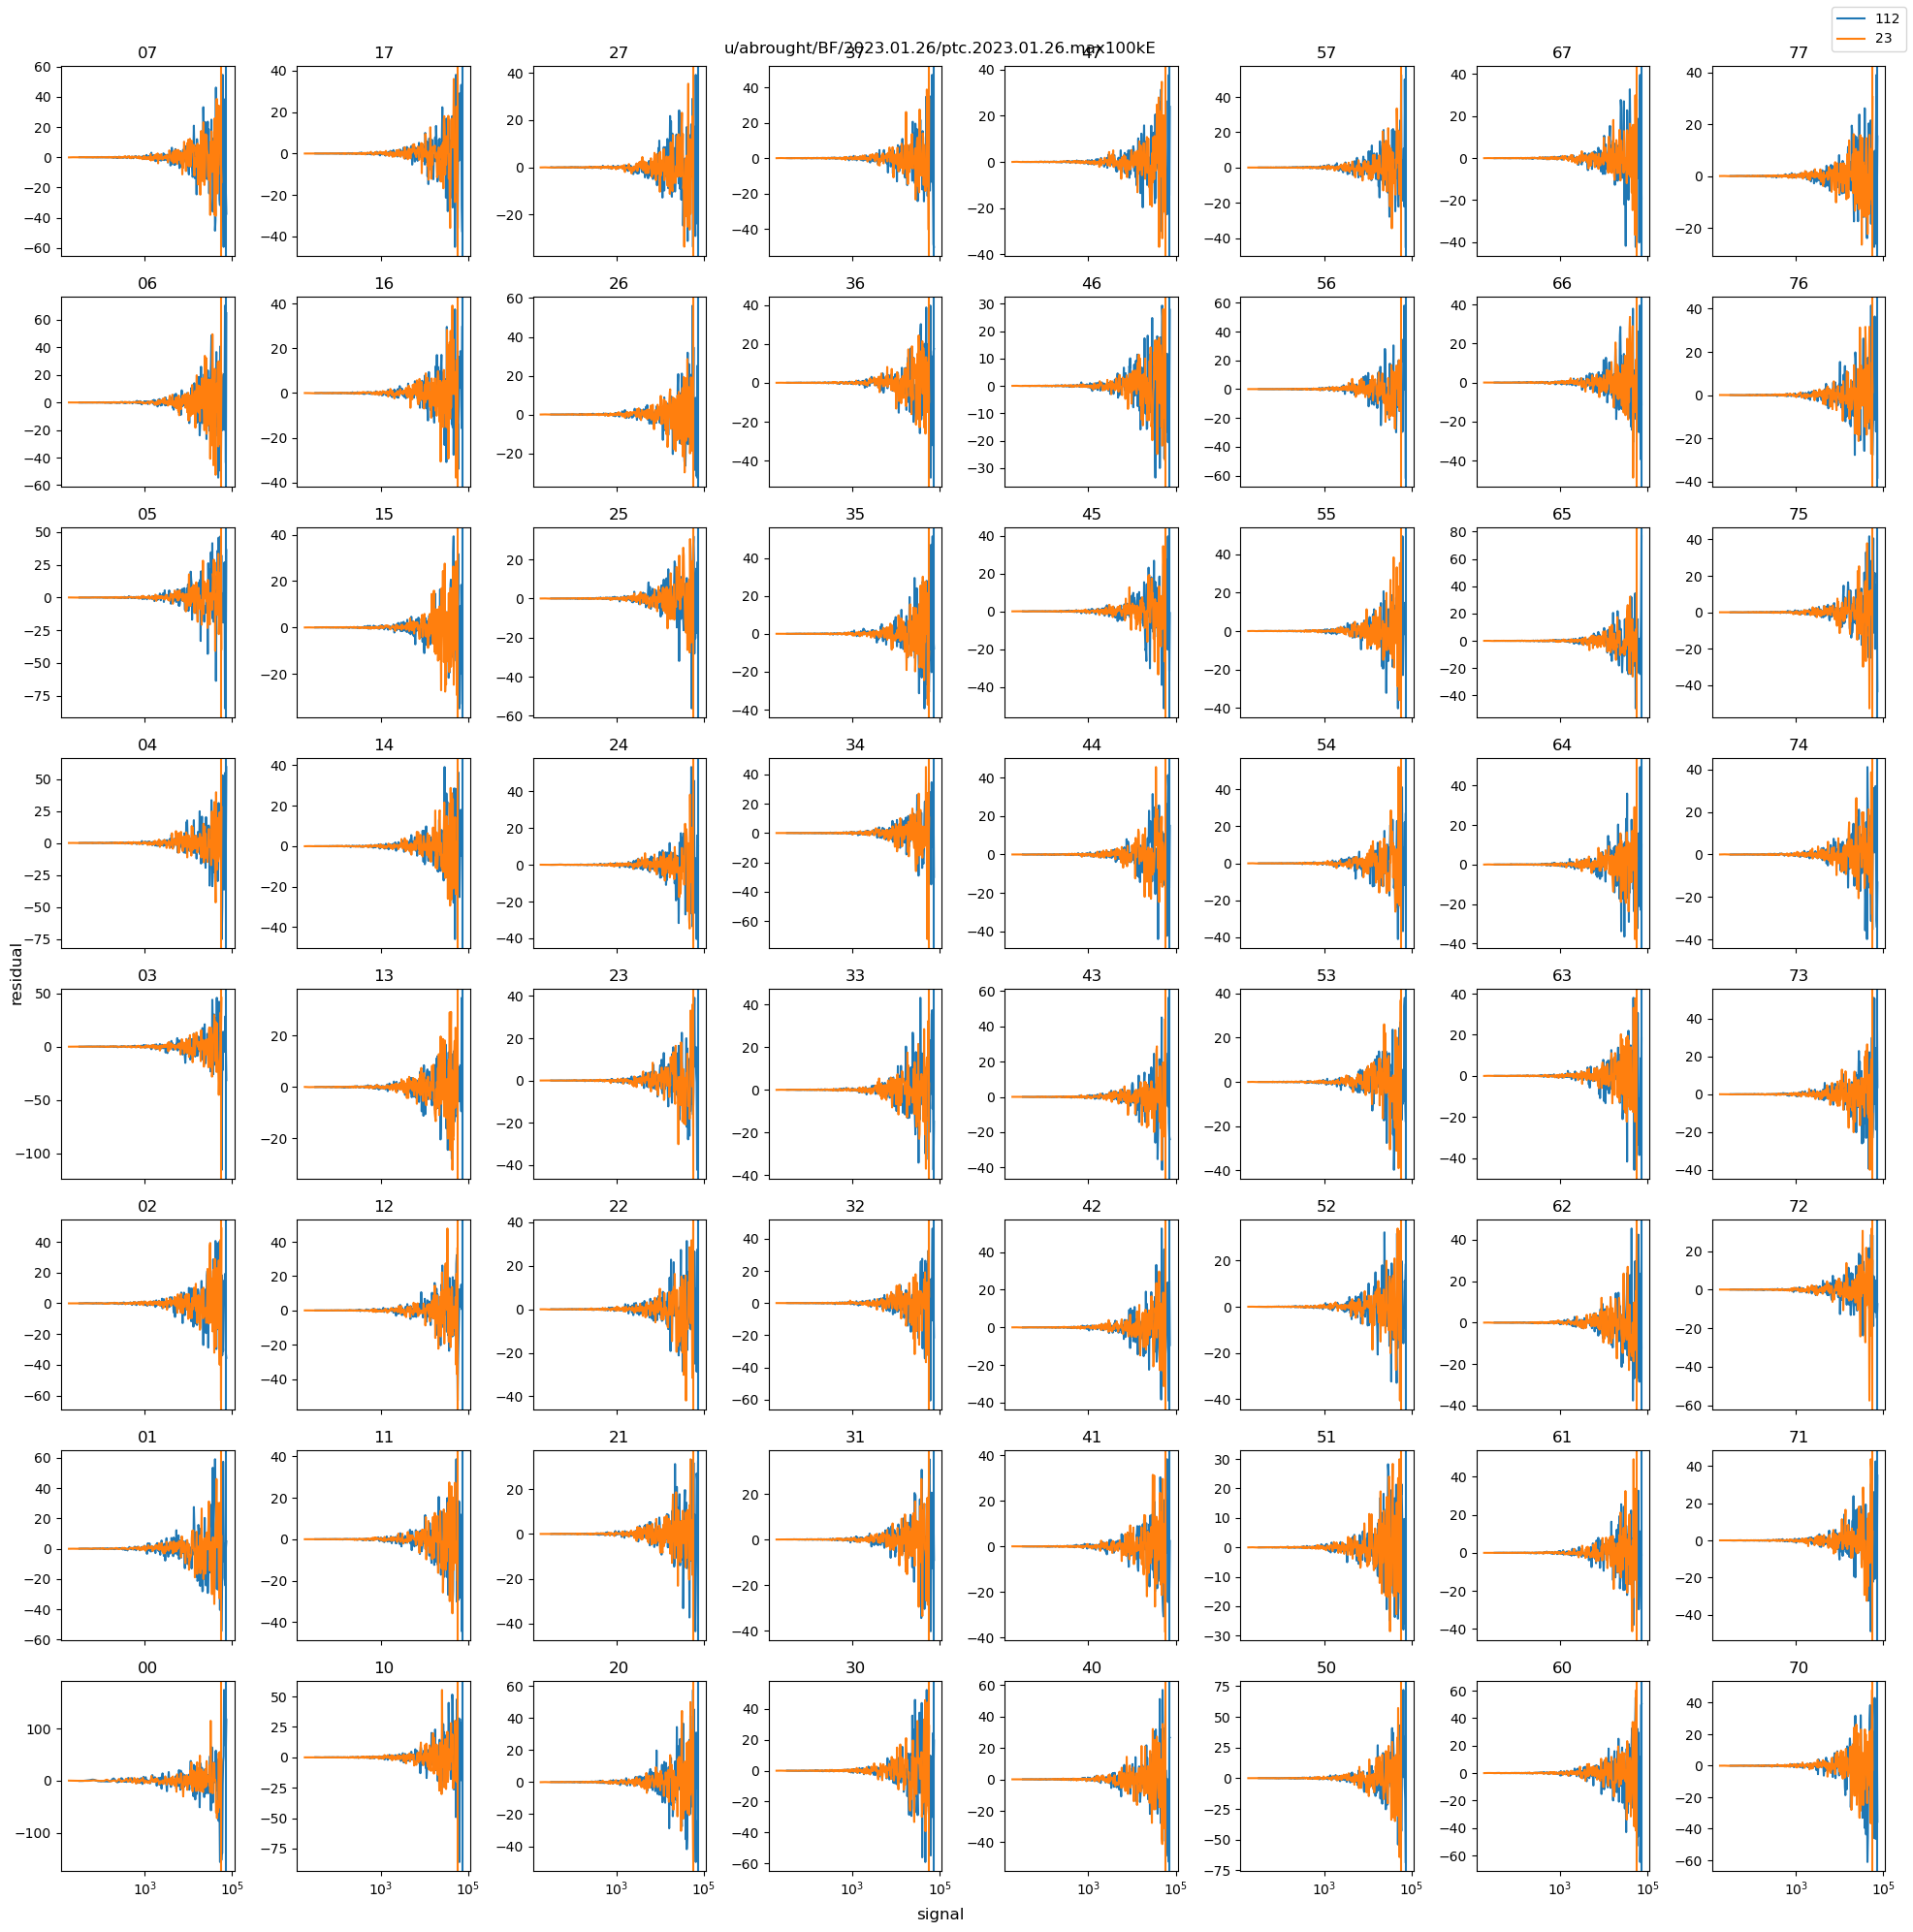

In [ ]:
fig,axs=plt.subplots(8,8,figsize=(20,20),sharex=True)
#plt.subplots_adjust(hspace=0,wspace=0)

for (i,j) in itertools.product( range(8), range(8) ):
    ax=axs[7-i][j] ## y,x
    for detector in [ 112, 23 ]:
        ptc=butler.get('ptc', detector=detector, instrument='LSSTCam', collections=collections)
    #    ax.plot(ptc.finalMeans[amp], (numpy.array(ptc.finalVars[amp])-numpy.array(ptc.finalModelVars[amp]))/numpy.array(ptc.finalVars[amp]),
    #            "x",label="final")

        c=ax.plot(numpy.array(ptc.rawMeans[amp])[ptc.expIdMask[amp]],
                ((numpy.array(ptc.covariances[amp])[:,i,j]-numpy.array(ptc.covariancesModel[amp])[:,i,j]))[ptc.expIdMask[amp]]
                ,label=detector)
        ax.axvline(ptc.ptcTurnoff[amp],color=c[0].get_color())        

        ax.set_title(f"{j}{i}")
        ax.semilogx()
    #    ax.set_ylim(-.05,.05)
        ax.grid()
#        ax.legend()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.supylabel("residual")
fig.supxlabel("signal")
fig.suptitle(f"{collections}")
fig.tight_layout()

Text(0.5, 0.98, 'u/abrought/BF/2023.01.26/ptc.2023.01.26.max100kE')

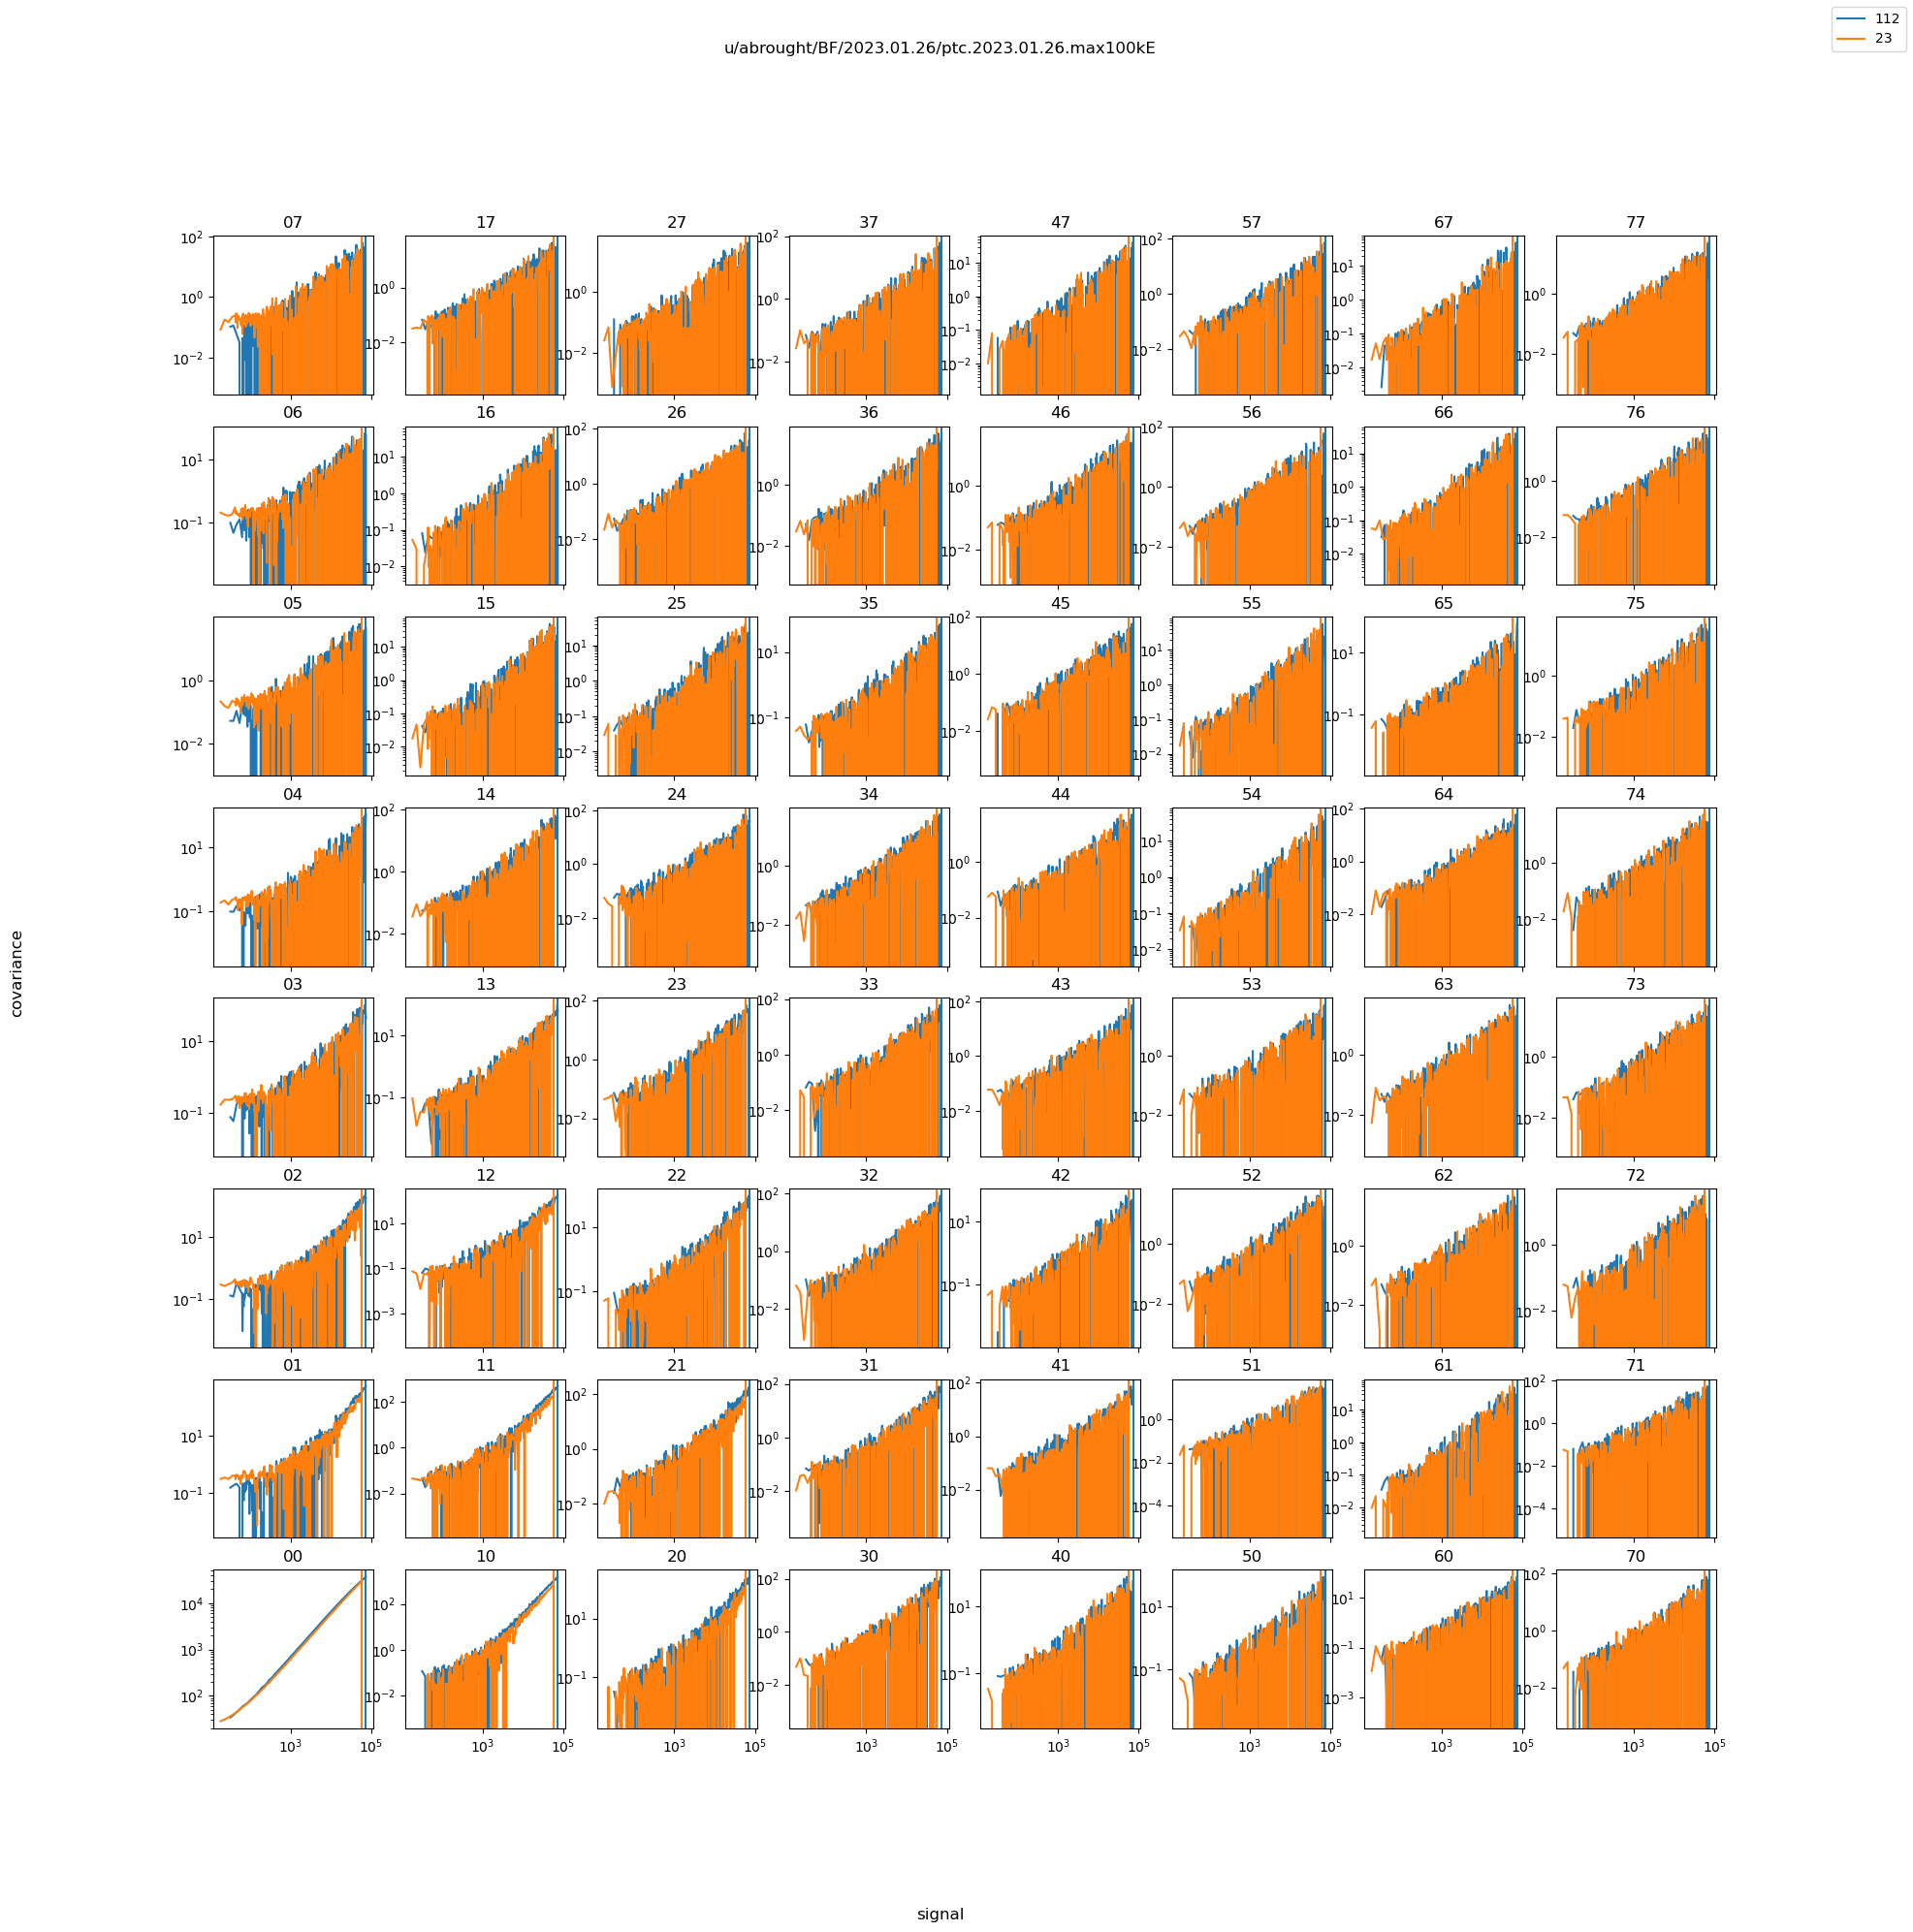

In [ ]:
fig,axs=plt.subplots(8,8,figsize=(20,20),sharex=True)
#plt.subplots_adjust(hspace=0,wspace=0)

for (i,j) in itertools.product( range(8), range(8) ):
    ax=axs[7-i][j] ## y,x
    for detector in [ 112, 23 ]:
        ptc=butler.get('ptc', detector=detector, instrument='LSSTCam', collections=collections)
    #    ax.plot(ptc.finalMeans[amp], (numpy.array(ptc.finalVars[amp])-numpy.array(ptc.finalModelVars[amp]))/numpy.array(ptc.finalVars[amp]),
    #            "x",label="final")

        c=ax.plot(numpy.array(ptc.rawMeans[amp])[ptc.expIdMask[amp]],
                numpy.array(ptc.covariances[amp])[:,i,j][ptc.expIdMask[amp]]
                ,label=detector)    

        ax.axvline(ptc.ptcTurnoff[amp],color=c[0].get_color())
        ax.set_title(f"{j}{i}")
        ax.loglog()
    #    ax.set_ylim(-.05,.05)
        ax.grid()
#        ax.legend()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.supylabel("covariance")
fig.supxlabel("signal")
fig.suptitle(f"{collections}")
#fig.tight_layout()

In [1]:
collections = 'u/abrought/BF/2023.04.18/R03-S12/ptc.reduced_to_1000_to_PTC_turnoff'
fig,axs=plt.subplots(8,8,figsize=(20,20),sharex=True)
#plt.subplots_adjust(hspace=0,wspace=0)

for (i,j) in itertools.product( range(8), range(8) ):
    ax=axs[7-i][j] ## y,x
    for detector in [ 112, 23 ]:
        ptc=butler.get('ptc', detector=detector, instrument='LSSTCam', collections=collections)
    #    ax.plot(ptc.finalMeans[amp], (numpy.array(ptc.finalVars[amp])-numpy.array(ptc.finalModelVars[amp]))/numpy.array(ptc.finalVars[amp]),
    #            "x",label="final")

        c=ax.plot(numpy.array(ptc.rawMeans[amp])[ptc.expIdMask[amp]],
                numpy.array(ptc.covariancesModel[amp])[:,i,j][ptc.expIdMask[amp]]
                ,label=detector)    

        #ax.axvline(ptc.ptcTurnoff[amp],color=c[0].get_color())
        ax.set_title(f"{j}{i}")
        ax.loglog()
    #    ax.set_ylim(-.05,.05)
        ax.grid()
#        ax.legend()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.supylabel("covarianceModel")
fig.supxlabel("signal")
fig.suptitle(f"{collections}")
#fig.tight_layout()

NameError: name 'plt' is not defined

u/abrought/BF/2023.01.26/ptc.2023.01.26.max100kE:
A[0][1]/A[1][0]:  2.1598742483120694
u/abrought/BF/2023.01.26/ptc.2023.01.26.BFCorrected:
A[0][1]/A[1][0]:  -4.074109941804187


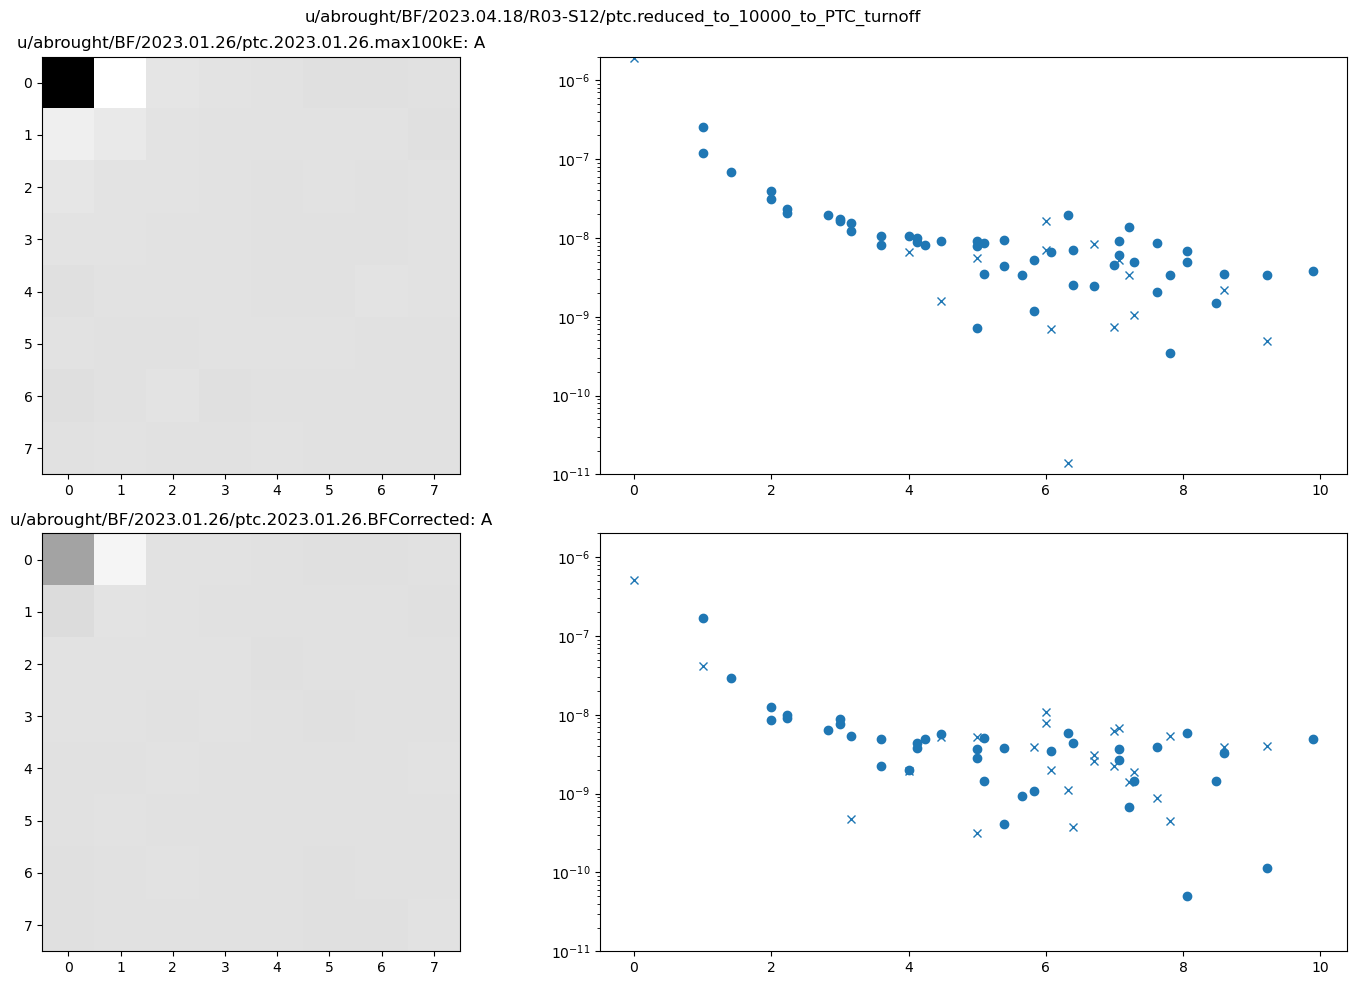

In [35]:
from matplotlib.colors import LogNorm
fig,axs=plt.subplots(2,2,figsize=(15,10))

for i, collection in zip(range(2),[ 'u/abrought/BF/2023.01.26/ptc.2023.01.26.max100kE',
                                  'u/abrought/BF/2023.01.26/ptc.2023.01.26.BFCorrected']):
    ax=axs[i] ## y,x

    ptc=butler.get('ptc', detector=23, instrument='LSSTCam', collections=collection)
    if i==0:
        vmin=numpy.min(ptc.aMatrix[amp])
        vmax=numpy.max(ptc.aMatrix[amp])
        vmin2=numpy.min(ptc.covariances[amp][0])
        vmax2=numpy.max(ptc.covariances[amp][0])
    
    im=ax[0].imshow(ptc.aMatrix[amp],origin="upper", vmin=vmin, vmax=vmax, cmap="gray")
    print(f"{collection}:")
    print("A[0][1]/A[1][0]: ", ptc.aMatrix[amp][0][1]/ptc.aMatrix[amp][1][0])
    #print("(A[0][0] - A[1][1])/A[1][0]: ", ptc.aMatrix[amp][0][1]/ptc.aMatrix[amp][1][0])
    ax[0].set_title(f"{collection}: A")
    #im=ax[1].imshow(ptc.covariances[amp][0],origin="upper", vmin=vmin2, vmax=vmax2, cmap="gray")
    #ax[1].set_title(f"{collection}: Covariances[0,:,:]")
    x,y=numpy.meshgrid(numpy.arange(8),numpy.arange(8))
    for a in [ptc.aMatrix[amp]]:
        c=ax[1].plot(numpy.sqrt(x**2+y**2).flatten(), numpy.array(a).flatten(),"o")
        ax[1].plot(numpy.sqrt(x**2+y**2).flatten(), -numpy.array(a).flatten(),"x",mec=c[0].get_color())
        ax[1].set_ylim(1e-11,2e-6)
        ax[1].semilogy()

#fig.supylabel("covarianceModel")
#fig.supxlabel("signal")
fig.suptitle(f"{collections}")
fig.tight_layout()

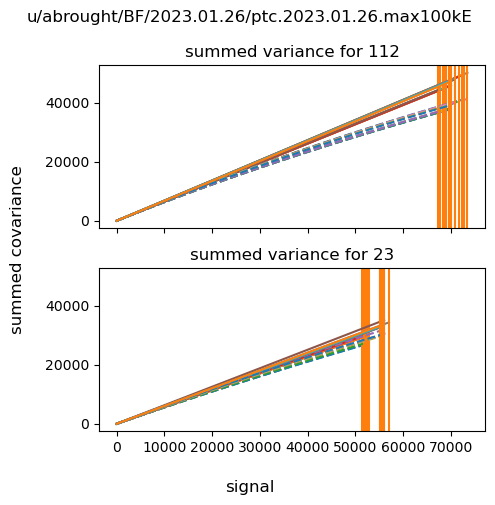

In [372]:
fig,axs=plt.subplots(2,1,figsize=(5,5),sharex=True,sharey=True)
#plt.subplots_adjust(hspace=0,wspace=0)

i,j=0,0
for amp in [ f'C{x:02d}' for x  in list(range(8))+list(range(10,18)) ]:
    for ax,detector in zip(axs,[ 112,23 ]):
        ptc=butler.get('ptc', detector=detector, instrument='LSSTCam', collections=collections)
    #    ax.plot(ptc.finalMeans[amp], (numpy.array(ptc.finalVars[amp])-numpy.array(ptc.finalModelVars[amp]))/numpy.array(ptc.finalVars[amp]),
    #            "x",label="final")

        ax.plot(numpy.array(ptc.rawMeans[amp])[ptc.expIdMask[amp]],
                numpy.sum(numpy.array(ptc.covariancesModel[amp]),axis=(1,2))[ptc.expIdMask[amp]],
                "--",label=detector)
        ax.plot(ptc.rawMeans[amp], 1/ptc.gain[amp]*numpy.array(ptc.rawMeans[amp])+ptc.noise[amp] )

        ax.axvline(ptc.ptcTurnoff[amp],color=c[0].get_color())
        ax.set_title(f"summed variance for {detector}")
    #    ax.loglog()
    #    ax.semilogx()
    #    ax.set_ylim(-.05,.05)
        ax.grid()
    #        ax.legend()
fig.supylabel("summed covariance")
fig.supxlabel("signal")
fig.suptitle(f"{collections}")
fig.tight_layout()

In [380]:
bfk=butler.get('bfk', detector=23, instrument='LSSTCam', collections='u/abrought/BF/2023.01.26/bfks.2023.01.26.max100kE.noQuadFit.corrModelr_3')

bfk.detKernels

{}

/tmp/ipykernel_9311/4182295390.py:19: RuntimeWarning: divide by zero encountered in power
  ax[1].plot(x,2e-6*x**-2.6)
/tmp/ipykernel_9311/4182295390.py:19: RuntimeWarning: divide by zero encountered in power
  ax[1].plot(x,2e-6*x**-2.6)


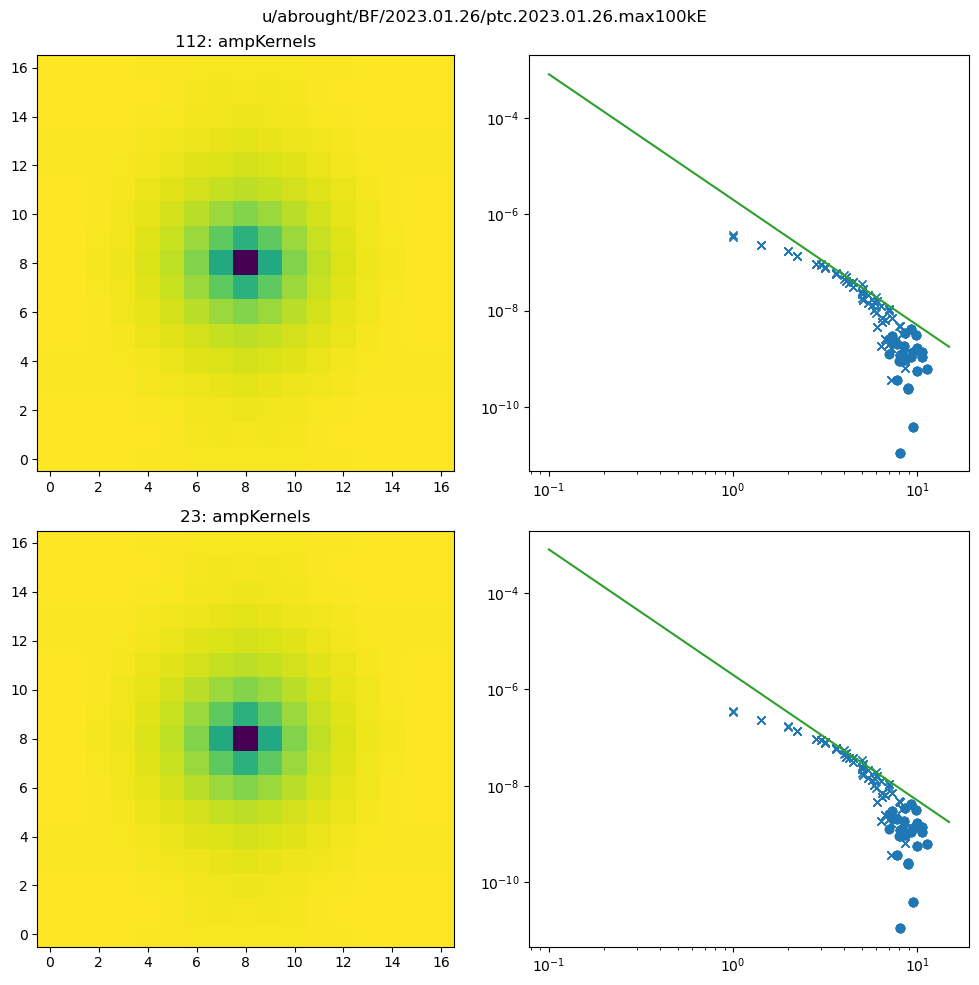

In [395]:
from matplotlib.colors import LogNorm
fig,axs=plt.subplots(2,2,figsize=(10,10))

amp="C10"
for i, detector in zip(range(2),[ 112, 23 ]):
    ax=axs[i] ## y,x

    ptc=butler.get('bfk', detector=detector, instrument='LSSTCam', collections='u/abrought/BF/2023.01.26/bfks.2023.01.26.max100kE.noQuadFit.corrModelr_3')

    im=ax[0].imshow(bfk.ampKernels[amp],origin="lower")
    ax[0].set_title(f"{detector}: ampKernels")
    x,y=numpy.meshgrid(numpy.arange(17),numpy.arange(17))
    for a in [bfk.ampKernels[amp] ]:
        c=ax[1].plot(numpy.sqrt((x-8)**2+(y-8)**2).flatten(), numpy.array(a).flatten(),"o")
        ax[1].plot(numpy.sqrt((x-8)**2+(y-8)**2).flatten(), -numpy.array(a).flatten(),"x",mec=c[0].get_color())

        ax[1].loglog()
        x=numpy.arange(0,15,0.1)
        ax[1].plot(x,2e-6*x**-2.6)
#fig.supylabel("covarianceModel")
#fig.supxlabel("signal")
fig.suptitle(f"{collections}")
fig.tight_layout()

In [ ]:
collections=['u/abrought/BF/2023.04.17/ptc.2023.04.17']
subbutler = Butler(repo_path,collections=collections)
subregistry = subbutler.registry
for dtype in subregistry.queryDatasetTypes():
    try:
        datasetRefs = list(subregistry.queryDatasets(datasetType=dtype,collections=collections))        
        if len(datasetRefs)==0:
            continue
        print(len(datasetRefs), dtype )
    except:
        pass
#        print("Error", dtype )

6188213 DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)
1 DatasetType('camera', {instrument}, Camera, isCalibration=True)
567 DatasetType('defects', {instrument, detector}, Defects, isCalibration=True)
569 DatasetType('bias', {instrument, detector}, ExposureF, isCalibration=True)
567 DatasetType('flat', {band, instrument, detector, physical_filter}, ExposureF, isCalibration=True)
567 DatasetType('dark', {instrument, detector}, ExposureF, isCalibration=True)
6 DatasetType('packages', {}, Packages)
138087 DatasetType('isr_metadata', {band, instrument, detector, physical_filter, exposure}, PropertySet)
6 DatasetType('isr_config', {}, Config)
132591 DatasetType('cpPtcProc', {band, instrument, detector, physical_filter, exposure}, Exposure)
129843 DatasetType('cpCovariances', {band, instrument, detector, physical_filter, exposure}, PhotonTransferCurveDataset)
382 DatasetType('ptc', {instrument, detector}, PhotonTransferCurveDataset, isCalibration=True)
